# Шаг 1. Загрузка данных и подготовка к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [3]:
#Импортируем нужные нам библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# импортируем функции для работы со временем
from datetime import datetime, timedelta
import numpy as np

Читаем файлы:

In [4]:
visits=pd.read_csv('/datasets/visits_info_short.csv')

In [5]:
orders=pd.read_csv('/datasets/orders_info_short.csv')

In [6]:
costs=pd.read_csv('/datasets/costs_info_short.csv')

Выводим их на экран:

In [7]:
visits.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [8]:
orders.head(5)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [9]:
costs.head(5)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Изменим заглавные буквы в названии столбцов на маленькие и заодно сменим пробел на нижнее подчеркивание :

In [10]:
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]

In [11]:
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns]

In [12]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]

Посмотрим типы данных и количество значений в столбцах:

In [13]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Переведём столбцы с датой и временем в соответстующий формат

In [14]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [16]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [17]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [18]:
costs['dt'] = pd.to_datetime(costs['dt'],format='%Y-%m-%d')

Посмотрим количество дубликатов в датафрейме:

In [19]:
visits.duplicated().sum()

0

In [20]:
orders.duplicated().sum()

0

In [21]:
costs.duplicated().sum()

0

Иногда при просмотре минимальных и максимальных значений столбцов датафрейма можно заметить некоторые странности, которые в последствии оказываются аномалиями:

In [22]:
visits.min()

user_id                       599326
region                        France
device                       Android
channel                   AdNonSense
session_start    2019-05-01 00:00:41
session_end      2019-05-01 00:07:06
dtype: object

In [23]:
visits.max()

user_id                 999999563947
region                 United States
device                        iPhone
channel                      organic
session_start    2019-10-31 23:59:23
session_end      2019-11-01 01:38:46
dtype: object

In [24]:
costs.min()

dt         2019-05-01 00:00:00
channel             AdNonSense
costs                      0.8
dtype: object

In [25]:
costs.max()

dt         2019-10-27 00:00:00
channel         lambdaMediaAds
costs                    630.0
dtype: object

Данные в столбце costs одноименного датафрейма нам мало о чём говорят, на первый взгляд. Построим ящик с усами, чтобы увидеть разброс значений.

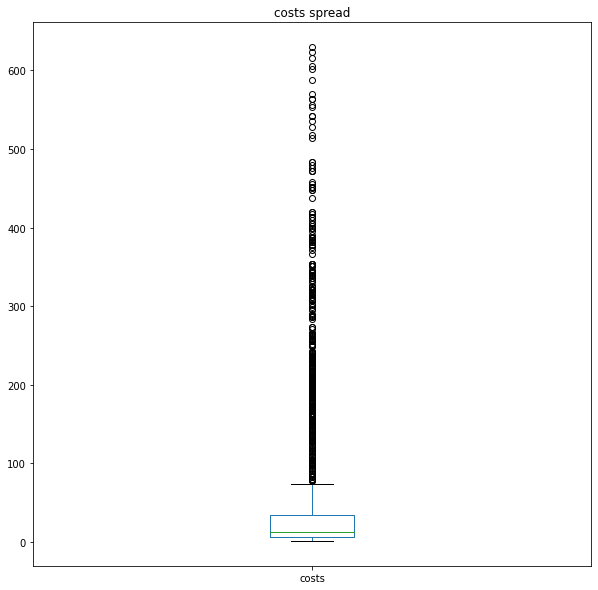

In [26]:
plt.figure(figsize=(10,10))
costs['costs'].plot.box(title='costs spread', y = 'costs');

Явных выбросов на графике мы не видим. Скорее всего цены на рекламные кампании у разных каналов сильно отличаются, проверим это посмотрев среднее значение стоимости рекламной кампании и сумму трат на рекламные кампании:

In [27]:
#Сгруппируем датафрейм по каналу привлечения и посчитаем средние затраты на рекламную кампанию
costs.groupby('channel').agg({'costs': 'mean'})

,costs
channel,
AdNonSense,21.729167
FaceBoom,180.253333
LeapBob,9.986667
MediaTornado,5.302667
OppleCreativeMedia,11.951389
RocketSuperAds,10.183333
TipTop,304.173889
WahooNetBanner,28.616667
YRabbit,5.245667


In [28]:
#Сгруппируем датафрейм по каналу привлечения и посчитаем сумму затрат на рекламную кампанию
costs.groupby('channel').agg({'costs': 'sum'})

,costs
channel,
AdNonSense,3911.25
FaceBoom,32445.60
LeapBob,1797.60
MediaTornado,954.48
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
TipTop,54751.30
WahooNetBanner,5151.00
YRabbit,944.22


Как мы видим, стоимости рекламных кампаний действительно отличаются в зависимости от канала привлечения. Скорее всего, с данными всё в порядке. Поэтому продолжим.

In [29]:
orders.min()

user_id                  599326
event_dt    2019-05-01 00:28:11
revenue                    4.99
dtype: object

In [30]:
orders.max()

user_id            999895427370
event_dt    2019-10-31 23:56:56
revenue                   49.99
dtype: object

<AxesSubplot:title={'center':'spread of revenue'}>

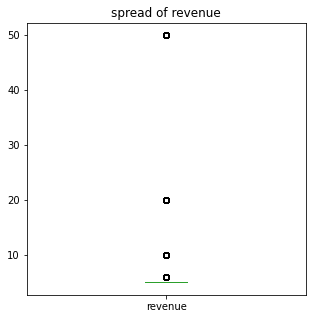

In [31]:
plt.figure(figsize=(5,5))
orders['revenue'].plot.box(title = 'spread of revenue')

Ящик с усами выглядит неоднозначно, но скорее всего суммы заказа фиксированны и представляют собой примерно 5 идентичных сумм. Проверим это:

In [32]:
#Посчитаем количество каждого значения в колонке revenue
orders['revenue'].value_counts()

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

Мои предположения подтвердились, двигаемся дальше.
Следующим шагом я предлагаю прооверить столбцы, в которых могут быть неявные дубликаты, на их наличие:

In [33]:
#Смотрим уникальные значения столбца
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [34]:
#Смотрим уникальные значения столбца
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [35]:
#Смотрим уникальные значения столбца
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [36]:
#Смотрим уникальные значения столбца
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

На данном этапе предобработки неявных дубликатов не выявлено.

# Шаг 2. Задание функций для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

## Создание пользовательских профилей

In [37]:
def get_profiles(sessions, orders, ad_costs):
    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles["dt"] = pd.to_datetime(profiles['dt'],format='%Y-%m-%d')
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )
    new_users["dt"] = pd.to_datetime(new_users['dt'],format='%Y-%m-%d')
    
    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

In [38]:
#Вызовем функцию
profiles = get_profiles(visits, orders, costs)

In [39]:
#Выведем журнал пользовательских сессий 
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [40]:
#Назначим момент анализа
observation_date = datetime(2019, 11, 1).date()

## Конверсия

Конверсия показывает сколько пользователей от общего числа совершили целевое действие(в нашем случае это покупка в приложении)

In [41]:
#Ф-я конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    conversion_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    conversion_raw = conversion_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    conversion_raw['lifetime'] = (
        conversion_raw['event_dt'] - conversion_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        conversion_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    conversion_grouped = group_by_dimensions(conversion_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    conversion_in_time = group_by_dimensions(
        conversion_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return conversion_raw, conversion_grouped, conversion_in_time

In [42]:
#Вызов функции
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(profiles, orders, observation_date, 14)

In [43]:
#Вывод на экран
conversion_grouped

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,142620,0.04092,0.046705,0.049516,0.051522,0.052973,0.053898,0.054677,0.055392,0.055946,0.056458,0.056738,0.056977,0.057145,0.057369


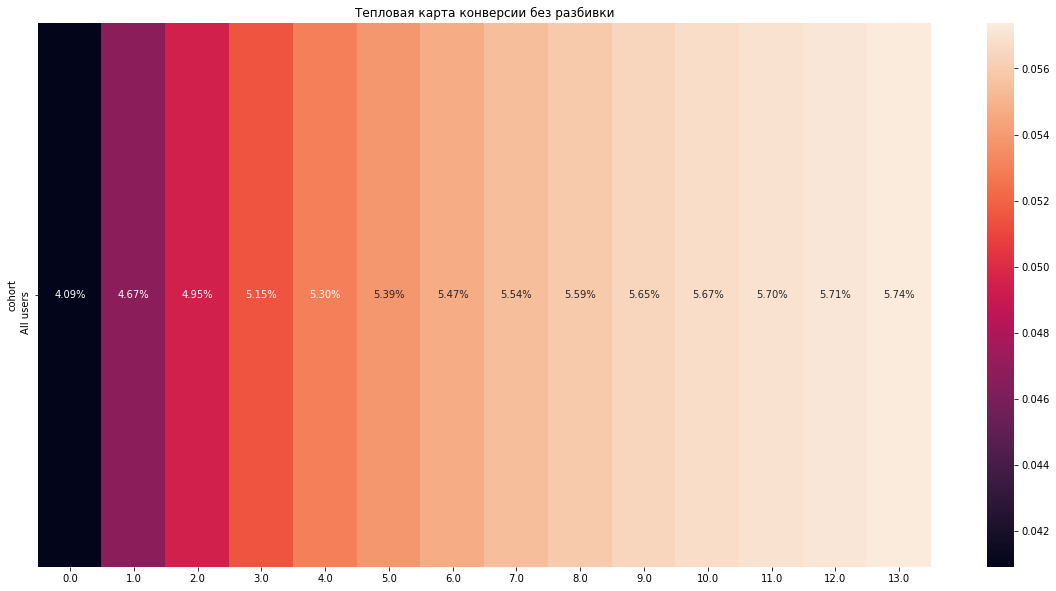

In [44]:
# строим хитмэп по таблице конверсии
plt.figure(figsize=(20,10))
sns.heatmap(conversion_grouped.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии без разбивки')
plt.show() 

Процент конверсии не выглядит большим

## Удержание

Retention Rate показывает, сколько пользователей из когорты относительно их изначального числа вернулись, то есть воспользовались продуктом или услугой, в последующие периоды.

In [45]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [46]:
#Вызовем функцию get_retention, назначим горизонт анализа 14 дней
retention_raw, retention_grouped, result_in_time  = get_retention(profiles, visits,observation_date, 14)

In [47]:
#Выведем на экран
retention_grouped

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
payer,,,,,,,,,,,,,,,
False,134200,1.0,0.176811,0.086356,0.051468,0.034493,0.024516,0.018443,0.013994,0.011818,0.009478,0.007750,0.006610,0.005872,0.004575
True,8420,1.0,0.404751,0.316746,0.259739,0.226841,0.209264,0.187767,0.173634,0.162589,0.150950,0.149406,0.137173,0.133373,0.121496


## LTV, CAC,ROI

Теперь рассчитаем LTV и ROI одной функцией, но сначала дадим определение этим терминам.
LTV, или Lifetime Value, — это «пожизненная ценность» клиента, то есть общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок. В теории эта метрика включает все прошлые, нынешние и будущие покупки пользователя. На практике чаще анализируют LTV за определённый срок — первые 1, 3, 7 и 14 дней после регистрации.
ROI, или Return On Investment, — окупаемость инвестиций. В экономике одного покупателя эта метрика показывает, на сколько процентов LTV превысил CAC(стоимость привлечения клиента).

In [48]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [49]:
#Вызовем функцию 
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles, orders, observation_date, 14
)

In [50]:
#Вывод пожизненной ценности клиента
result_grouped

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,142620,0.241267,0.310905,0.364073,0.408661,0.447512,0.481909,0.513263,0.541481,0.569211,0.594565,0.617813,0.639767,0.661289,0.680757


In [51]:
#Посмотрим на сколько ltv больше cac
roi_grouped

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,142620,0.694753,0.347269,0.447504,0.524031,0.58821,0.644131,0.69364,0.738771,0.779386,0.819299,0.855793,0.889256,0.920855,0.951833,0.979855


Значения ROI очень малы, кажется, привлечение пользователей не окупается

Построим график, чтобы посмотреть стоимость привлечения пользователей(CAC) в разбивке по дням

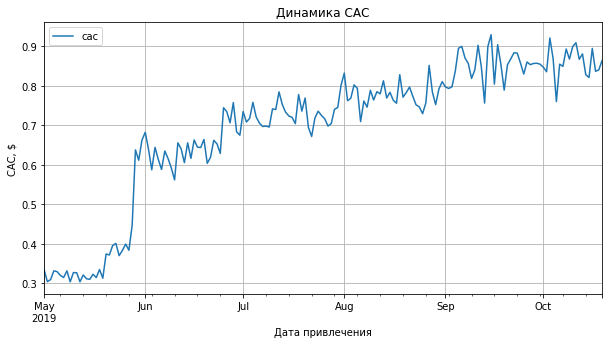

In [52]:
#Построим сводную таблицу и создаём график
roi_in_time.pivot_table(
    index='dt', values='cac', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))

plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС')
plt.show()

Не очень понятно много это или мало, лучше всего нам ответит на этот вопрос график ROI с чертой уровня окупаемости

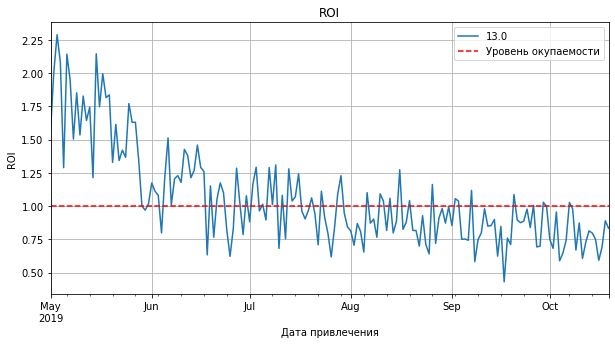

In [53]:
#Создаём сводную таблицу и строим график истории изменения ROI последнего дня
roi_in_time.pivot_table(
    index='dt', values=13, aggfunc='mean'
).plot(grid=True, figsize=(10, 5))

plt.title('ROI')
plt.ylabel('ROI')
plt.xlabel('Дата привлечения')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

Ситуация выглядит катастрафично, пользователи  не окупаются после июня, и окупаемость в целом стремится к нулю, понятно, почему компания терпит убытки

# Шаг 3. Проведение исследовательского анализа данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

Чтобы выяснить распределение пользователей по странам, сгруппируем датафрейм по столбцу region и посчитаем количество уникальных пользователей из каждой страны:

In [54]:
visits_by_states = profiles.groupby('region').agg({'user_id': 'nunique'})

In [55]:
#Переименуем столбец 
visits_by_states = visits_by_states.rename(columns={'user_id': 'amount_of_users'})

In [56]:
#Выводим результат на экран
visits_by_states

,amount_of_users
region,
France,17450
Germany,14981
UK,17575
United States,100002


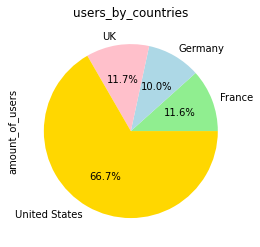

In [57]:
#Построим круговую диаграмму, где будет видно распределение пользователей по странам
colors = ['lightgreen', 'lightblue', 'pink', 'gold']
visits_by_states.plot(kind = 'pie', y = 'amount_of_users', legend=False, autopct='%1.1f%%', colors = colors, 
                      title ='users_by_countries');

<div class="alert alert-danger">

 ЧТобы избавиться от `<AxesSubplot:ylabel='amount_of_users'>`, можно поставить `;` в конце строки или же написать `plt.show()`
</div>


Разделим пользователей на платящих и неплатящих, чтобы посмотреть сколько платящих и неплатящих пользователей в каждой стране

In [58]:
payers = profiles.query('payer ==True')

In [59]:
non_payers = profiles.query('payer != True')

Сгруппируем датафрейм с платящими пользователями по стране и увидим количество уникальных платящих пользователей в разбивке по странам:

In [60]:
payers_by_states = payers.groupby('region').agg({'user_id': 'nunique'})

In [61]:
#Переименуем столбец 
payers_by_states = payers_by_states.rename(columns={'user_id': 'amount_of_users'})

In [62]:
#Выведем на экран
payers_by_states

,amount_of_users
region,
France,663
Germany,616
UK,700
United States,6902


Сделаем группировку по всем пользователям

In [63]:
users_by_states = profiles.groupby('region').agg({'user_id': 'nunique'})

In [64]:
#Переименуем столбец
users_by_states = users_by_states.rename(columns={'user_id': 'amount_of_users'})

In [65]:
users_by_states

,amount_of_users
region,
France,17450
Germany,14981
UK,17575
United States,100002


То же самое проделаем с неплятящими пользователями

In [66]:
non_payers_by_states = non_payers.groupby('region').agg({'user_id': 'nunique'})

In [67]:
#Переименуем столбец 
non_payers_by_states = non_payers_by_states.rename(columns={'user_id': 'amount_of_users'})

In [68]:
non_payers_by_states

,amount_of_users
region,
France,16787
Germany,14365
UK,16875
United States,93100


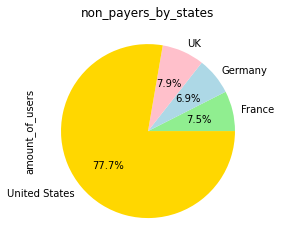

In [69]:
colors = ['lightgreen', 'lightblue', 'pink', 'gold']
payers_by_states.plot(kind = 'pie', y = 'amount_of_users', legend=False, autopct='%1.1f%%', colors = colors, 
                      title = 'non_payers_by_states');

Большая часть платящих пользователей сконцентрирована в США, но мы не можем просто сравнивать эти цифры, чтобы сделать выводы в какой из стран больше пользователей платит, ибо у нас разные размеры выборок по регионам. Поэтому для корректного анализа мы можем посмотреть на процент платящих пользователей в каждом регионе:

In [70]:
#поделим количество платящих пользователей на количество неплатящих пользователей и умножим на 100
payer_percent_by_states = (payers_by_states/users_by_states)*100

In [71]:
#Переименуем столбец 
payer_percent_by_states = payer_percent_by_states.rename(columns={'amount_of_users': 'perc_of_users'})

In [72]:
#Выведем на экран
payer_percent_by_states

,perc_of_users
region,
France,3.799427
Germany,4.111875
UK,3.982930
United States,6.901862


Круговая диаграмма не покажет нам значения из таблицы payer_percent_by_states, но зато мы сможем увидеть сколько процентов от платящих пользователей сосредоточено в конкретной стране и соответсвенно сравнить страны по этому показателю

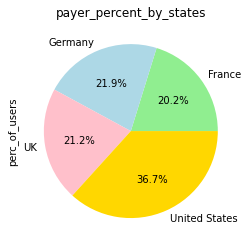

In [73]:
colors = ['lightgreen', 'lightblue', 'pink', 'gold']
payer_percent_by_states.plot(kind = 'pie', y = 'perc_of_users', legend=False, autopct='%1.1f%%', colors = colors, 
                            title='payer_percent_by_states');

С большим отрывом по проценту платящих пользователей лидирует США, в Великобритании платящих пользователей чуть меньше, чем в Германии, и далее с небольшим отрывом идёт Франция. Поскольку США в целом лидирует по количеству пользователей, мы можем увидеть зависимость, которая описана в законе больших чисел.

Мы закончили с разбивкой пользователей по регионам и следующая задача-сделать также с разбивкой по девайсам.

In [74]:
#Группируем датафрейм со всеми пользователями по столбцу device и считаем уникальных пользователей,
#заходивших с определенного устройства
users_by_devices = profiles.groupby('device').agg({'user_id': 'nunique'})

In [75]:
#Переименуем столбец 
users_by_devices = users_by_devices.rename(columns={'user_id': 'amount_of_users'})

In [76]:
#Выводим на экран
users_by_devices

,amount_of_users
device,
Android,35032
Mac,30042
PC,30455
iPhone,54479


In [77]:
#Группируем датафрейм с платящими пользователями по столбцу device и считаем уникальных пользователей,
#заходивших с определенного устройства
payers_by_devices = payers.groupby('device').agg({'user_id': 'nunique'})

In [78]:
#Переименуем столбец 
payers_by_devices = payers_by_devices.rename(columns={'user_id': 'amount_of_users'})

In [79]:
#Выводим на экран
payers_by_devices

,amount_of_users
device,
Android,2050
Mac,1912
PC,1537
iPhone,3382


In [80]:
#Группируем датафрейм с неплатящими пользователями по столбцу device и считаем уникальных пользователей,
#заходивших с определенного устройства
non_payers_by_devices = non_payers.groupby('device').agg({'user_id': 'nunique'})

In [81]:
#Переименуем столбец 
non_payers_by_devices = non_payers_by_devices.rename(columns={'user_id': 'amount_of_users'})

In [82]:
#Выводим на экран non_payers_by_devices 
non_payers_by_devices 

,amount_of_users
device,
Android,32982
Mac,28130
PC,28918
iPhone,51097


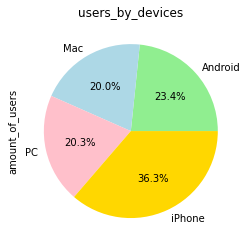

In [83]:
#Строим круговую диаграмму с разбивкой всех пользователей по девайсам
colors = ['lightgreen', 'lightblue', 'pink', 'gold']
users_by_devices.plot(kind = 'pie', y = 'amount_of_users', legend=False, autopct='%1.1f%%', colors = colors,
                     title = 'users_by_devices');

Большинство пользователей пользуется телефонами, а не ноутбуками или стационарными компьютерами.
Телефоны фирмы Apple встречаются чаще чем телефоны на базе Android, между Mac и PC разрыв совершенно не значительный

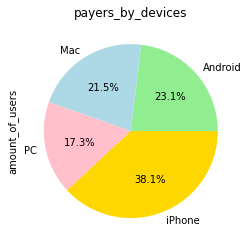

In [84]:
#Строим круговую диаграмму с разбивкой платящих пользователей по девайсам
colors = ['lightgreen', 'lightblue', 'pink', 'gold']
payers_by_devices.plot(kind = 'pie', y = 'amount_of_users', legend=False, autopct='%1.1f%%', colors = colors,
                      title = 'payers_by_devices');

Телефоны фирмы Apple встречаются чаще чем телефоны на базе Android, а Mac популярнее среди этой категории пользователей, чем PC.

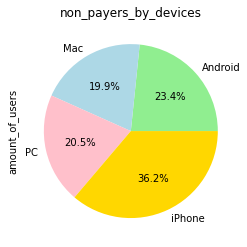

In [85]:
#Строим круговую диаграмму с разбивкой неплатящих пользователей по девайсам
colors = ['lightgreen', 'lightblue', 'pink', 'gold']
non_payers_by_devices.plot(kind = 'pie', y = 'amount_of_users', legend=False, autopct='%1.1f%%', colors = colors, 
                           title = 'non_payers_by_devices');

Процентное распределение по девайсам среди платящих и неплатящих пользователей почти не отличается. PC популярнее техники Mac, но разница не значительна.

При сравнении графиков стало понятно, что причина убытков компании не в том, что у категории пользователей с определённой маркой девайса не проходит оплата, распредления по девайсам для платящих и неплатящих пользователей очень похожи

In [86]:
#Сгруппируем общий датафрейм пользователей по каналам привлечения
users_by_channels = profiles.groupby('channel').agg({'user_id': 'nunique'})

In [87]:
#Переименуем столбец 
users_by_channels = users_by_channels.rename(columns={'user_id': 'amount_of_users'})

In [88]:
#Производим сортировку для более понятного графика
users_by_channels = users_by_channels.sort_values(by='amount_of_users', ascending = False)

In [89]:
#Выведем результат
users_by_channels

,amount_of_users
channel,
organic,56439
FaceBoom,29144
TipTop,19561
OppleCreativeMedia,8605
LeapBob,8553
WahooNetBanner,8553
RocketSuperAds,4448
MediaTornado,4364
YRabbit,4312


In [90]:
#Посмотрим минимальное количество привлеченных пользователей
users_by_channels['amount_of_users'].min()

2149

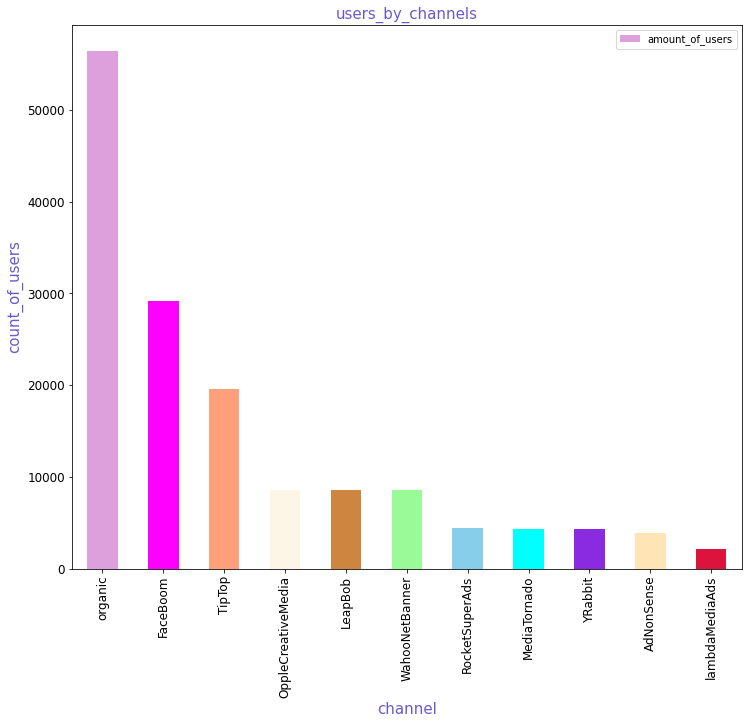

In [91]:
#Создадим переменную, в которой будут содержаться цвета для наших столбчатых диаграмм
colors = ["plum", "magenta", "lightsalmon", 'oldlace','peru', 'palegreen', 'skyblue', 'cyan', 'blueviolet','moccasin', 'crimson']
#Построим столбчатую диаграмму по столбцу, назначим цвета 
users_by_channels.plot(kind = 'bar', y = 'amount_of_users', color = colors, figsize = (12, 10))
#Установим подпись оси х
plt.xlabel('channel', fontsize=15, color='slateblue')
#Установим подпись оси y
plt.ylabel('count_of_users', fontsize=15, color='slateblue')
#Установим размер отметок по осям х и y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('users_by_channels', fontsize=15, color='slateblue');

Подавляющее число пользователей (почти 57 тысяч) пришли сами и компания не потратила на них рекламный бюджет. Среди самых популярных каналов привлечения можно выделить FaceBoom, с него пришло почти 30 тысяч пользователей, с отрывом около 10 тысяч идёт канал TipTop. Остальные каналы привлекли менее 10 тысяч пользователей. Канал lambdaMediaAds привлёк меньше всего пользователей.
Но рано делать какие-либо выводы-например, органические пользователи могут оказаться самыми неплатящими, а канал с самым меньшим охватом привлечения мог привлечь самую платёжеспособную аудиторию.

In [98]:
#Сгруппируем датафрейм с платящими пользователями по каналу привлечения
payers_by_channels = payers.groupby('channel').agg({'user_id': 'nunique'})

In [99]:
#Сгруппируем датафрейм с неплатящими пользователями по каналу привлечения
non_payers_by_channels = non_payers.groupby('channel').agg({'user_id': 'nunique'})

In [100]:
#Переименуем столбец 
payers_by_channels=payers_by_channels.rename(columns={'user_id': 'amount_of_users'})

In [101]:
#Посчитаем какой процент пользователей, пришедших из разных каналов привлечения, платит
percent_payers_channels = (payers_by_channels/users_by_channels)*100

In [104]:
#Переименуем столбец 
percent_payers_channels = percent_payers_channels.rename(columns={'amount_of_users': 'perc_of_payers'})

In [105]:
#Производим сортировку для более понятного графика
percent_payers_channels = percent_payers_channels.sort_values(by='perc_of_payers', ascending = False)

In [106]:
#Вывод рез-а на экран
percent_payers_channels

,perc_of_payers
channel,
FaceBoom,12.204914
AdNonSense,11.340206
lambdaMediaAds,10.469986
TipTop,9.600736
RocketSuperAds,7.913669
WahooNetBanner,5.296387
YRabbit,3.826531
MediaTornado,3.574702
LeapBob,3.063253


Теперь мы можем посмотреть на самые успешные с точки зрения привлечения каналы:

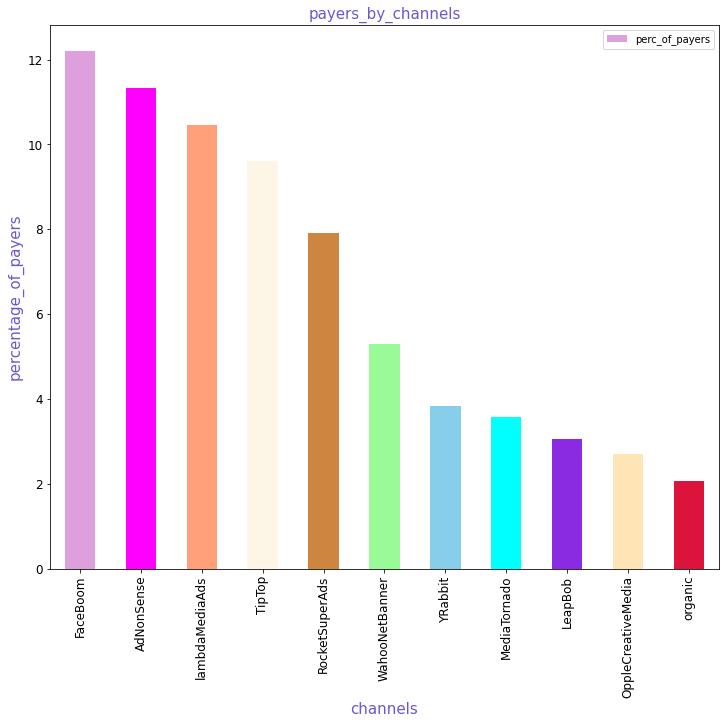

In [107]:
#Создадим переменную, в которой будут содержаться цвета для наших столбчатых диаграмм
colors = ["plum", "magenta", "lightsalmon", 'oldlace','peru', 'palegreen', 'skyblue', 'cyan', 'blueviolet','moccasin', 'crimson']
#Построим столбчатую диаграмму по столбцу, назначим цвета 
percent_payers_channels.plot(kind = 'bar', y = 'perc_of_payers', color = colors, figsize = (12, 10))
#Установим подпись оси х
plt.xlabel('channels', fontsize=15, color='slateblue')
#Установим подпись оси y
plt.ylabel('percentage_of_payers', fontsize=15, color='slateblue')
#Установим размер отметок по осям х и y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('payers_by_channels', fontsize=15, color='slateblue');

Среди органических пользователей процент плательщиков меньше всего. Исходя из этого графика, финансовые вложения в канал привлечения FaceBoom оправданы, он привлекает не только огромную часть пользователей, но и среди пользователей, пришедших с него, самый большой процент платящих людей. На втором месте канал AdNonSense. Канал OppleCreativeMedia привлекает меньше всего платёжеспособной аудитории. Также, с небольшим отрывом после него идёт каеал LeapBob. Возможно, стоимость рекламных компаний для этих источников дешевле, чем стоимость успешных рекламных компаний, с этим мы разберёмся на следующем шаге.

# Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [98]:
print('Общая сумма расходов на все реламные кампании:', costs['costs'].sum())

Общая сумма расходов на все реламные кампании: 105497.30000000002


Посмотрим траты на рекламу по времени(в разбивке по месяцам):

In [99]:
#Создадим копию датафрейма
costs_month = costs.copy(deep=True)

In [100]:
#Создадим столбец с месяцами 
costs_month['month'] = costs['dt'].dt.month

In [101]:
#Сгруппируем получившийся датафрейм по месяцу, получим сумму
costs_month = costs_month.groupby(['month']).agg({'costs': 'sum'})

In [102]:
#Выведем рез-т на экран
costs_month

,costs
month,
5,9978.570
6,15090.045
7,16447.060
8,20657.870
9,22441.340
10,20882.415


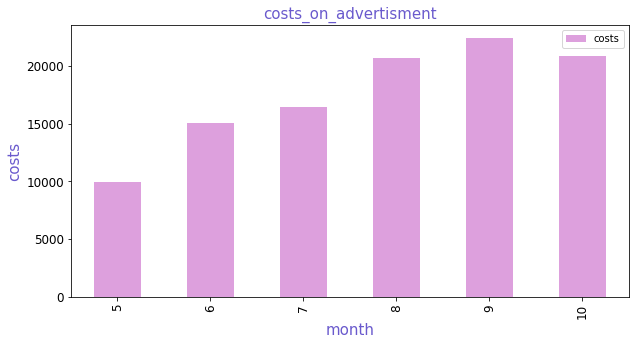

In [103]:
#Зададим цвета на графике
colors = ["plum"]
#Построим столбчатую диаграмму по столбцу, назначим цвета 
costs_month.plot(kind = 'bar', y = 'costs', figsize = (10, 5), color=colors)
#Установим подпись оси х
plt.xlabel('month', fontsize=15, color='slateblue')
#Установим подпись оси y
plt.ylabel('costs', fontsize=15, color='slateblue')
#Установим размер отметок по осям х и y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('costs_on_advertisment', fontsize=15, color='slateblue');

Распределение рекламного бюджета по месяцам выглядит вполне логично, сумма, отведенная на рекламу, росла с каждым месяцем, а поскольку данные за октябрь неполные и компания испытывала экономические трудности, траты на графике за 10 месяц меньше, чем за 9-ый.

Посмотрим сумму расходов на каждый источник привлечения в отдельности:

In [104]:
#Сгруппируем датафрейм по каналу привлечения и посчитаем сумму расходов, запишем рез-т в переменную
costs_by_channels = costs.groupby('channel').agg({'costs': 'sum'})

In [105]:
#Вывод рез-т на экран
costs_by_channels

,costs
channel,
AdNonSense,3911.25
FaceBoom,32445.60
LeapBob,1797.60
MediaTornado,954.48
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
TipTop,54751.30
WahooNetBanner,5151.00
YRabbit,944.22


In [106]:
#Производим сортировку для более понятного графика
costs_by_channels = costs_by_channels.sort_values(by='costs', ascending = False)

Построим график, чтобы увидеть распределние рекламного бюджета по каналам более наглядно:

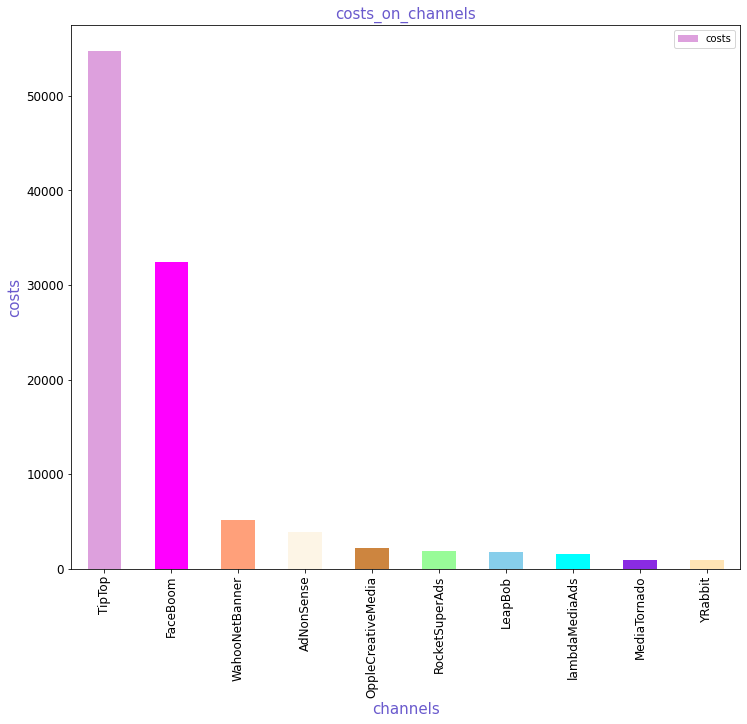

In [107]:
#Создадим переменную, в которой будут содержаться цвета для наших столбчатых диаграмм
colors = ["plum", "magenta", "lightsalmon", 'oldlace','peru', 'palegreen', 'skyblue', 'cyan', 'blueviolet','moccasin', 'crimson']
#Построим столбчатую диаграмму по столбцу, назначим цвета 
costs_by_channels.plot(kind = 'bar', y = 'costs', color = colors, figsize = (12, 10))
#Установим подпись оси х
plt.xlabel('channels', fontsize=15, color='slateblue')
#Установим подпись оси y
plt.ylabel('costs', fontsize=15, color='slateblue')
#Установим размер отметок по осям х и y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('costs_on_channels', fontsize=15, color='slateblue');

Больше всего денег вкладывалось в каналы TipTop и FaceBoom, расходы на данные каналы идут с большим отрывом от расходов на остальные каналов. Разница в расходах на каналы-лидеры тоже большая, на канал привлечеия TipTop было потрачено больше денег, и в целом половина рекламного бюджета ушла на этот канал.
Теперь вспомним прошлые графики, данный канал привлечения не являлся лидером по привлечению всех пользователей или платящих пользователей. В это же время, он не являлся аутсайдером. 
Пока не понятно почему половина бюджета уходит именно на этот канал

In [108]:
#Поделим сумму на количество привлеченных пользователей, рез-т - цена привлечения одного пользователя
cost_per_user = (costs_by_channels['costs']/users_by_channels['amount_of_users']).to_frame()

Теперь понятны причины убытков приложения Procrastinate Pro+.
Дороже всего обходятся пользователи, пришедшие из TipTop, при этом приблизительно половина рекламного бюджета отводится именно этому каналу. С учётом того, что у данного канала привлечения не самый большой процент привлечения платящих пользователей и просто пользователей в целом ситуация выглядит довольно печально.

# Шаг 5. Оценка окупаемости рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

In [109]:
#ф-я сглаживания датафрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Проанализируйте общую окупаемость рекламы

В шаге 2 мы выяснили, что реклама совершенно не окупается

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

In [110]:
#Исключаем органический трафик
non_organic_profiles = profiles.query('channel != "organic"')

In [111]:
# считаем LTV, CAC и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    non_organic_profiles,
    orders,
    observation_date,
    14,
    dimensions=['device'],
)

In [112]:
#Вывод ROI на экран
roi

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,,
Android,20683,1.019759,0.332645,0.422419,0.490517,0.544460,0.596376,0.648580,0.686250,0.724251,0.758989,0.791216,0.817714,0.839481,0.870765,0.894425
Mac,17747,1.276219,0.299506,0.376283,0.431058,0.474117,0.510255,0.537354,0.565601,0.589926,0.619766,0.646735,0.671809,0.692961,0.708825,0.729139
PC,18128,0.792724,0.349933,0.456068,0.542966,0.612637,0.680712,0.733701,0.796291,0.835044,0.884297,0.920135,0.960624,0.994933,1.024449,1.054801
iPhone,32086,1.277021,0.288114,0.357321,0.410253,0.456661,0.495005,0.527449,0.556536,0.587035,0.610762,0.636023,0.658115,0.679258,0.700380,0.718064


In [113]:
#фун-я для постройки графиков
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(30, 20))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

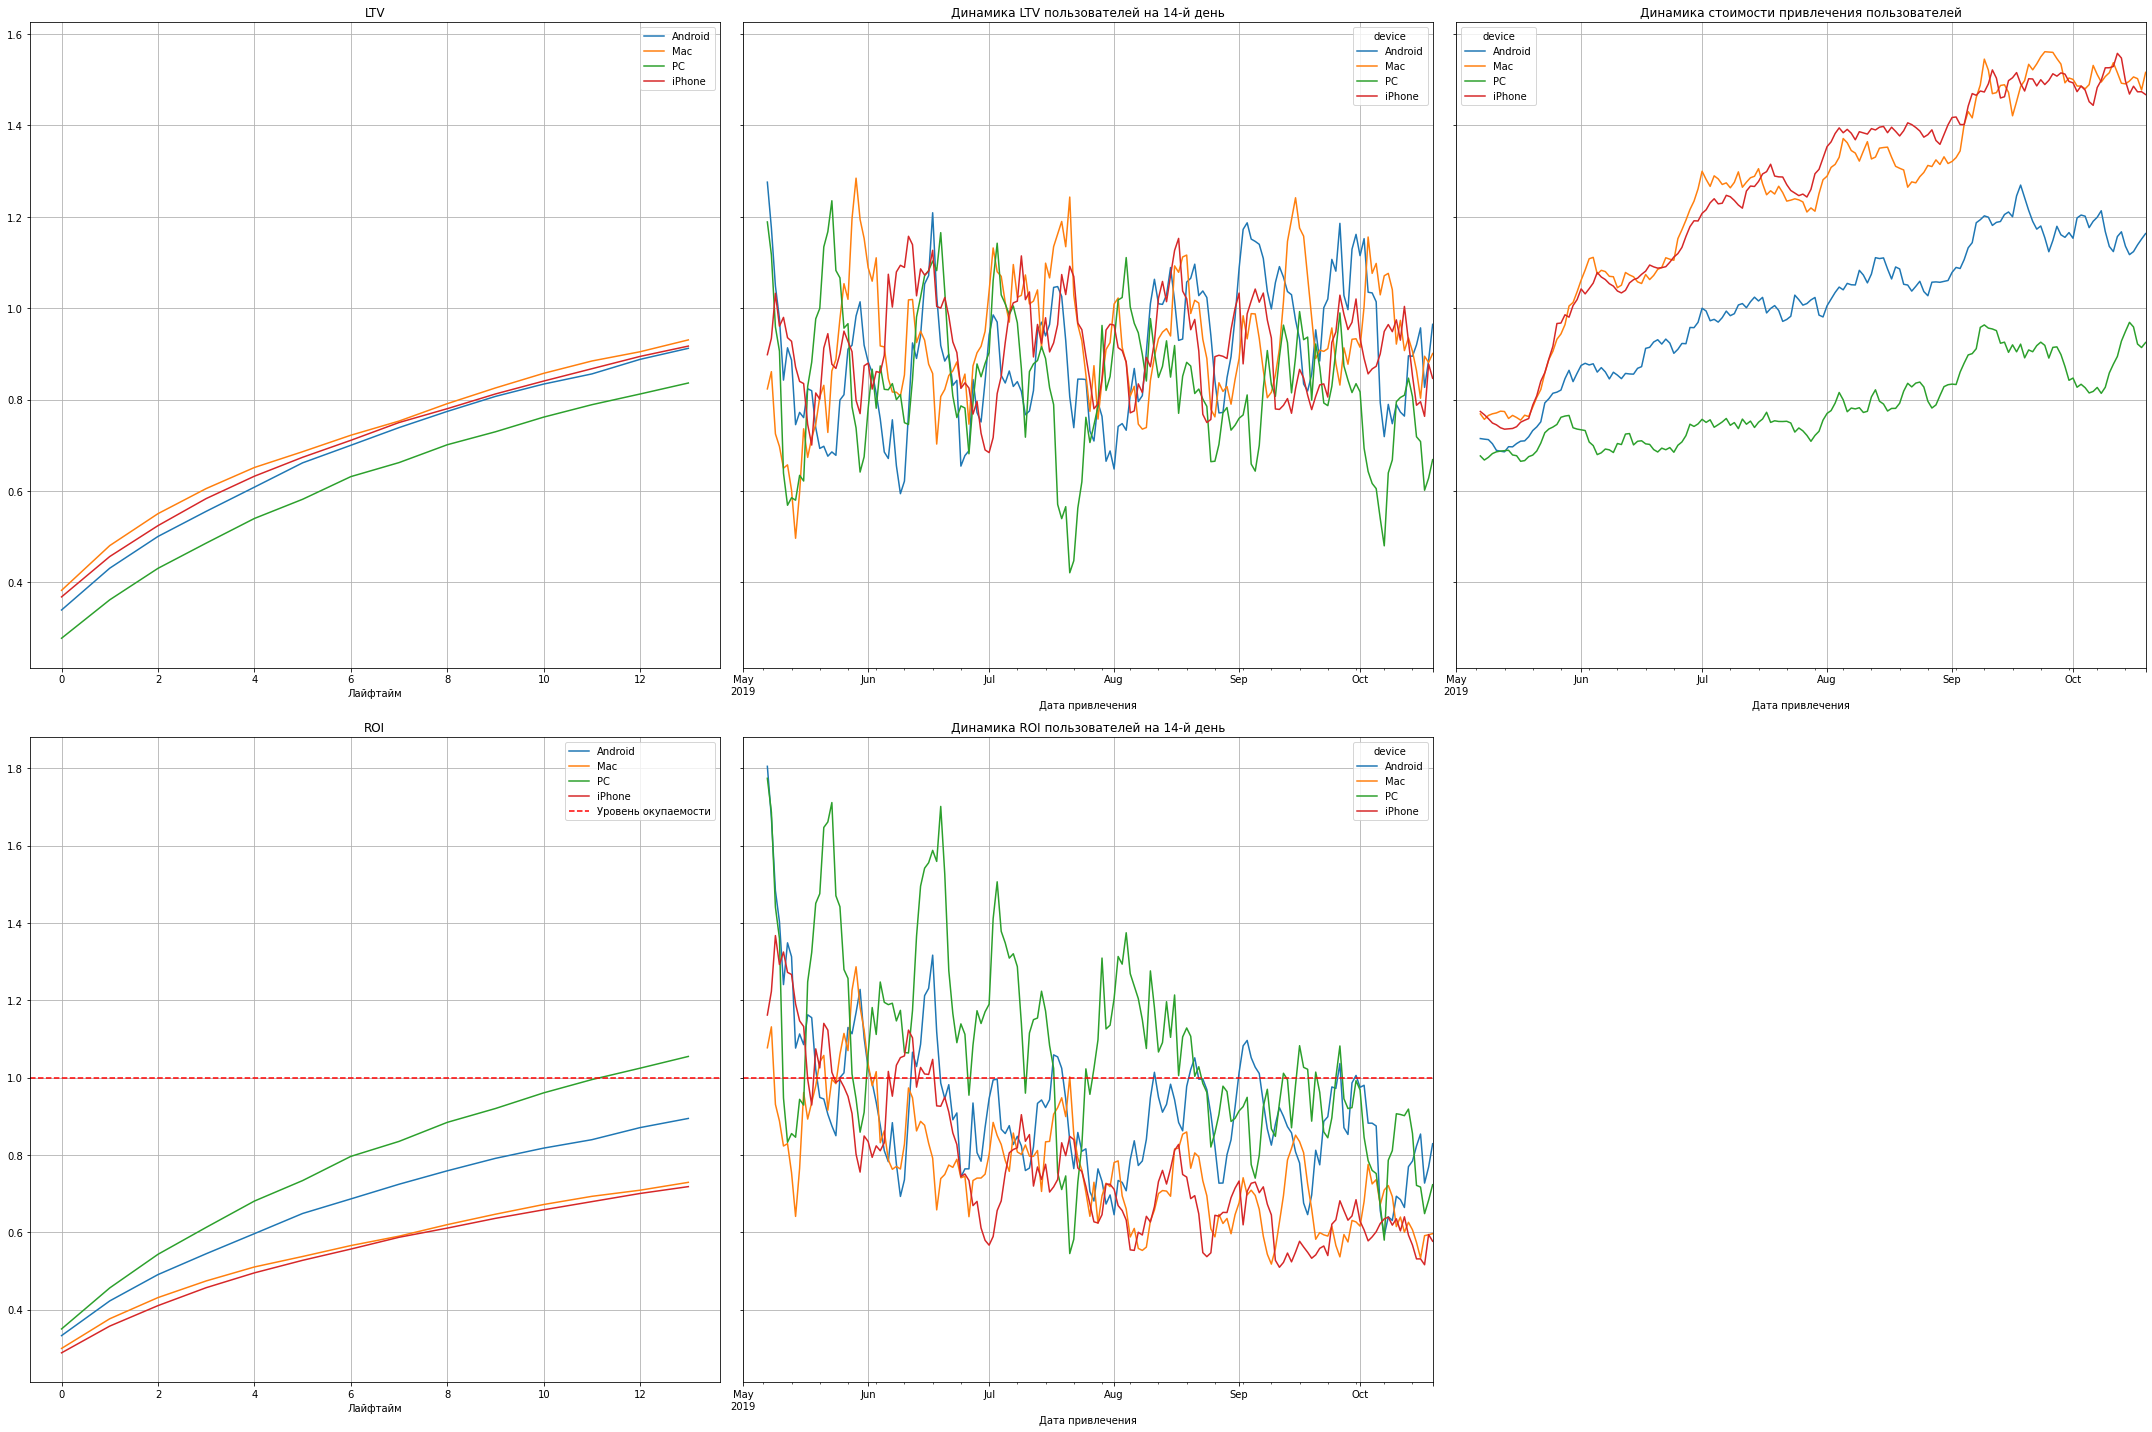

In [114]:
# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 

1)Более платежеспособны пользователи яблочных устройств, но как мы помним их количество в целом больше. Хуже всего показатель LTV у пользователей PC.

2)В первый месяц пользователи приносили меньше денег, чем в следующие. С июня по июль показатель LTV с разбивкой по устройствам был примерно одинаковый для всех устройств. В июле показатели LTV по Mac и Iphone выбились в лидеры. В августе общий показатель LTV упал. В середине сентября общий показатель LTV просел, но быстро пришел в норму, а лидерами последних месяцев (сентябрь-октябрь стали Mac и Android.

3)Дороже всего привлекать пользователей яблочных устройств, но мы помним, что показатель LTV среди этих пользователей выше всего, нужно посмотреть на график ROI, чтобы сделать выводы окупились они или нет

4)А лучший показатель ROI оказался у PC, но хорошим его тоже нельзя назвать, он перешагнул минимальный порог лишь на примерно 1/12.

5)В первый месяц работы в компании неплохо шли дела, но потом на графике видна тенденция к регрессии. Также, по графику видно, что компания в последние месяца стала действительно разоряться. В последней ячейке показатель ROI ни по какому устройсву не перешагнули минимального порога. Если говорить про график в целом, то пользователи PC и Android иногда окупаются. Уровень оккупаемости хуже всего у пользователей Mac и Iphone. Пользователи Iphone и Mac не перешагивали черту оккупаемости с конца июля.

In [115]:
#Вызовем фун-ю конверсии
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(non_organic_profiles, 
                                                                        orders,
                                                                        observation_date,
                                                                        14,
                                                                        dimensions = ['device'])

In [116]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

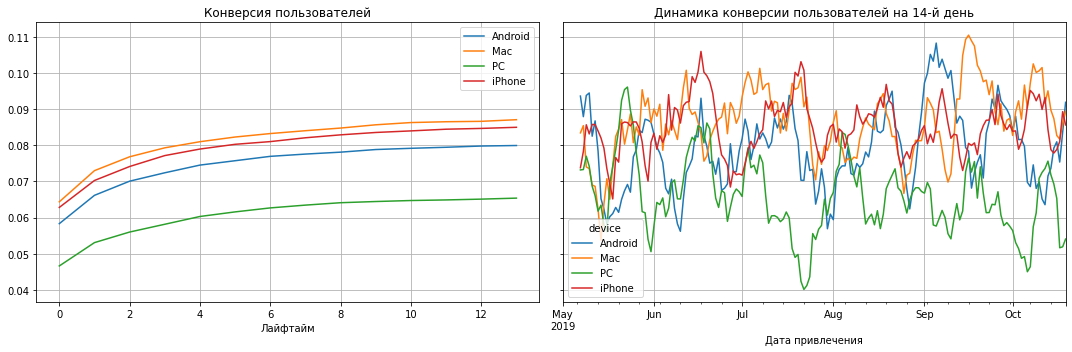

In [117]:
#Вызовем фун-ию постройки графиков по конверсии
plot_conversion(conversion_grouped, conversion_in_time, 14)

1)Лучше всего с конверсией у владельцев яблочных устройств, заметно реже становятся покупателями владельцы PC

2)В целом по динамике конверсии тоже видно, что лучше всего с конверсией у владельцев яблочных устройств. В некоторые месяца их догоняют владельцы Android, но  потом показатель идёт на снижение. С течением времени динамика не регрессирует, а значит пользователи продолжают совершать покупки в независимости от девайса.

In [118]:
#Вызовем фун-ю удержания
retention_raw, retention_grouped, retention_in_time = get_retention(non_organic_profiles, 
                                                                    visits,
                                                                    observation_date, 
                                                                    14, 
                                                                    dimensions = ['device'])

In [119]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

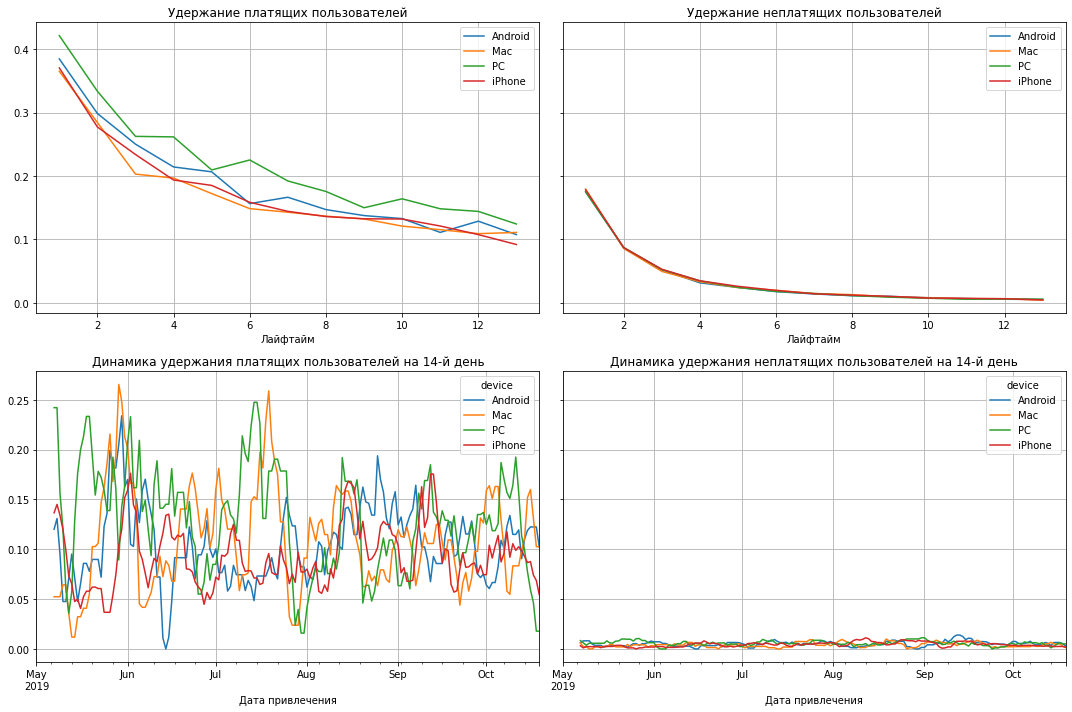

In [120]:
#Вызовем фун-ию построения графиков удержания
plot_retention(retention_grouped, retention_in_time, 14)

1)платящие пользователь-владельцы PC уходят реже всего. Владельцы яблочных устройств среди покупателей уходят чаще.

2)Неплатящие пользователи уходят в незавимости от девайса.

3)По графику видно, что удержание в независимости от устройства в последние месяцы упало. Но в целом самые хорошие показатели у пользователей PC и Mac. 

4)Теперь рассмотрим динамику удержания неплатящих пользователей на 14-й день. Она стабильно плоха во все месяца, но всё же мы можем заметить некоторые тенденции. В мае по показателю удержания лидировали пользователи PC. В июне всё было стабильно, а вот в июле есть пик динамики показателя у пользователей PC. В августе лидирество уходит пользователям с Iphone, а в сентяябре пользователям-владельцем андроида. В октябре лидируют пользователи PC.

### Проанализируйте окупаемость рекламы с разбивкой по странам

In [121]:
# считаем LTV, CAC и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    non_organic_profiles,
    orders,
    observation_date,
    14,
    dimensions=['region'],
)

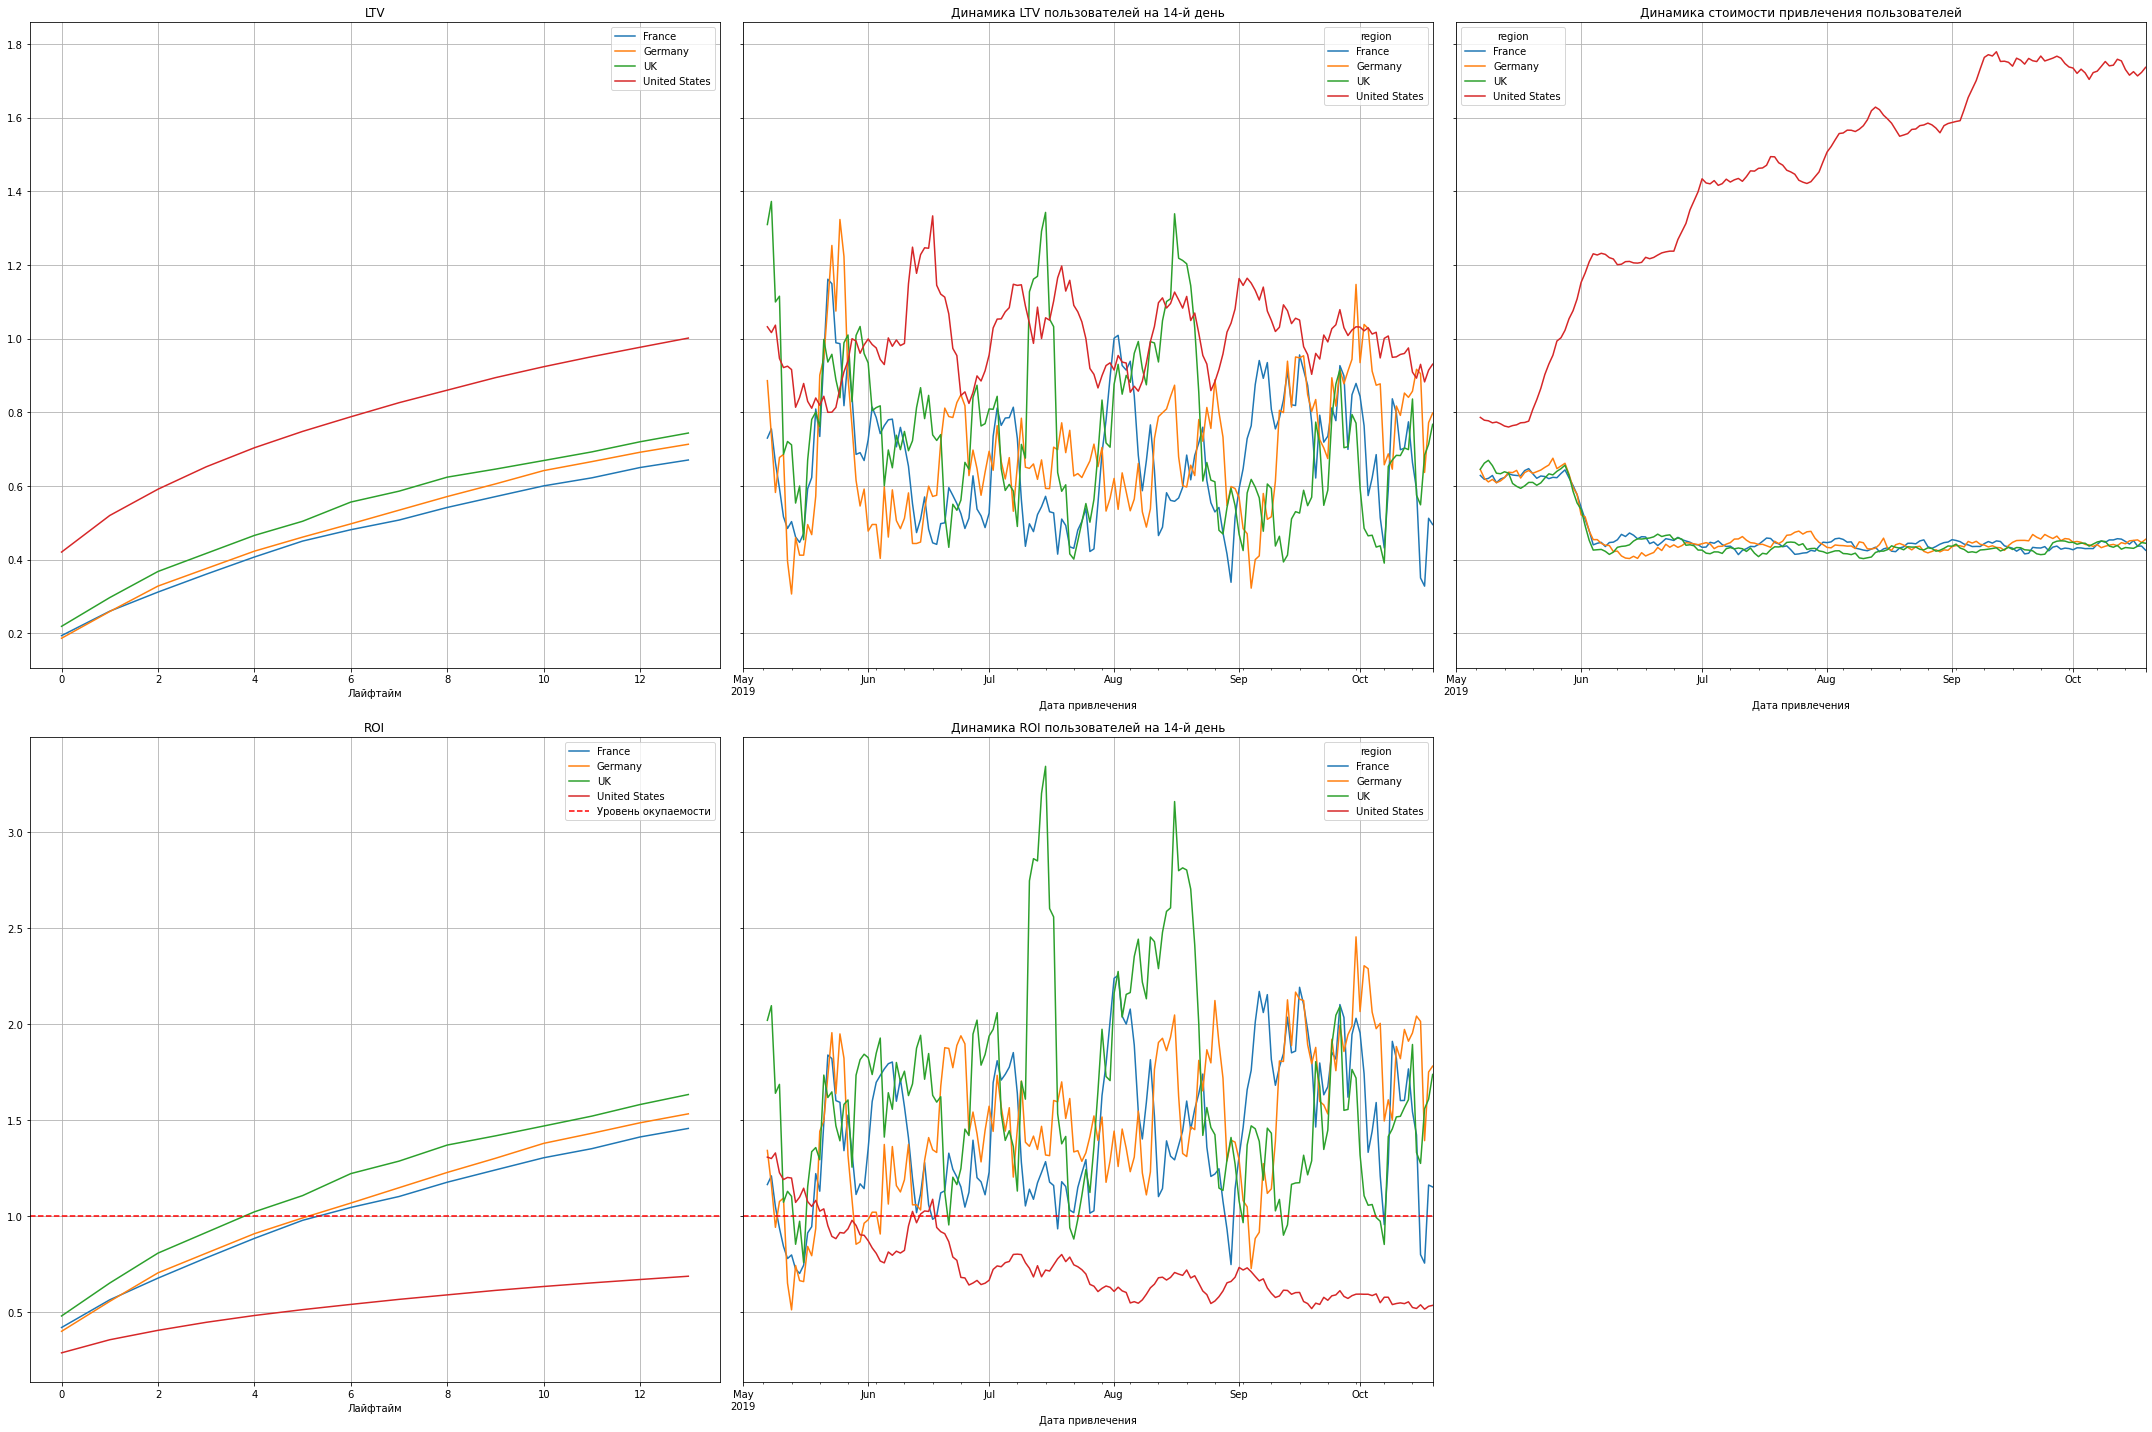

In [122]:
# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 

1)Больше всего денег приносят жители США, но как мы помним, их в целом больше среди всех пользователей. На втором месте по показателю LTV-Великобритания. Франция является аутсайдером по этому показателю

2)В динамике по показтелю LTV также лидируют пользователи из США, показтель LTV по США выглядит самым стабильным.

3)Рассмотрим CAC в разбивке по странам. Сразу бросается в глаза, что стоимость привлечения жителей США намного больше стоимости привлечения жителей других стран. Привлечение пользователей из других стран обходится примерно одинаково.

4)Только общность пользователей из США не перешагнула минимальный порог окупаемости. Пользователи из других стран окупились с неплохим отрывом от минимального порога окупаемости.

5)В первый месяц все пользователи хоть немного, но окупались в независимости от страны, потом показатель ROI среди пользователей из США упал ниже минимального порога окупаемости. В июле и августе показатель ROI для Великобритании значимо поднялся и это стало пиковыми точками графика. 

In [123]:
#Вызовем фун-ю конверсии
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(non_organic_profiles, 
                                                                        orders,
                                                                        observation_date,
                                                                        14,
                                                                        dimensions = ['region'])

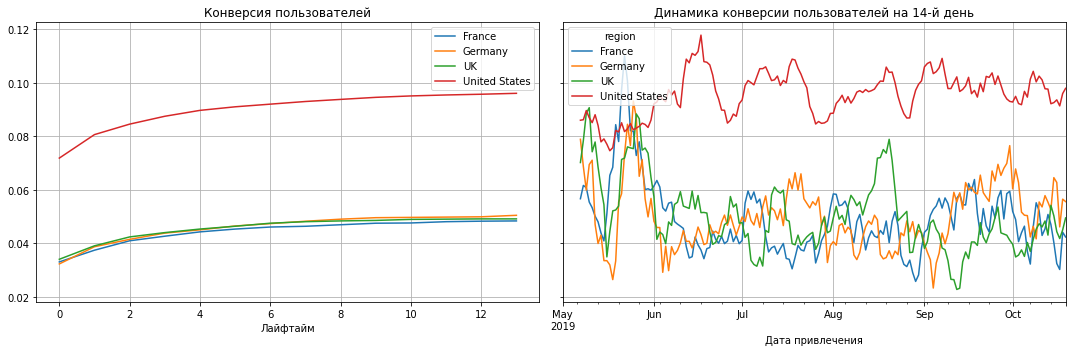

In [124]:
#Вызовем фун-ию конверсии
plot_conversion(conversion_grouped, conversion_in_time, 14)

1)Больше всего целевых действий (в нашем случае-это покупки в приложении) совершают пользователи из США, их конверсия идёт с большим отрывом от конверсии пользователей из других регионов. Показатель пользовательской конверсии по другим странамм находится примерно на одном уровне.

2)В первый месяц(май) пользователи из Германии, Великобритании и Франции имели хороший показатель конверсии, опережающий конверсию пользователей из США, но потом показатель этих стран резко упал вниз на протяжение всего оставшегося периода.

In [128]:
#Вызовем фун-ю удержания
retention_raw, retention_grouped, retention_in_time = get_retention(non_organic_profiles, 
                                                                    visits,
                                                                    observation_date, 
                                                                    14, 
                                                                    dimensions = ['region'])

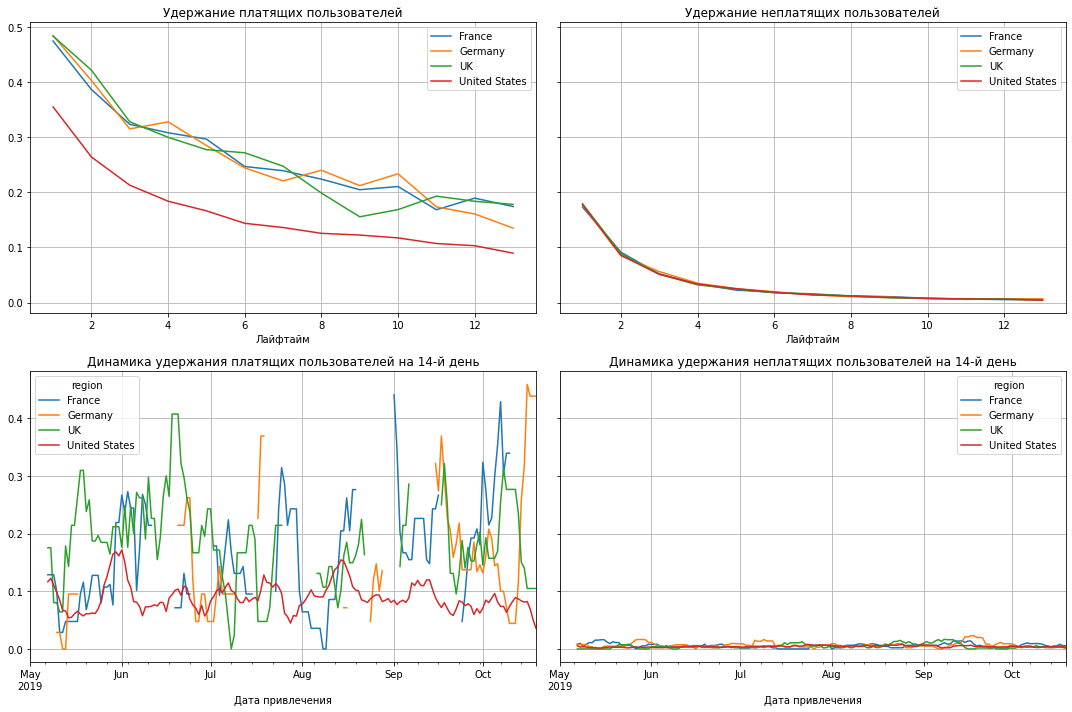

In [129]:
#Вызовем фун-ии постройки графиков
plot_retention(retention_grouped, retention_in_time, 14)

1)Хуже всего обстоят дела с удержанием платящих пользователей среди пользователей из США. Остальные страны по этому показателю примерно на одном уровне.

2)Удержание неплатящих пользователей очен низкое и почти не зависит от страны.

3)Стабильная, но низкая динамика удержания пользователей на 14-й день у США. В остальных странах динамика прерывается странным образом, и поэтому график выглядит не стандартно. Можно предположить, что пользователи из остальных стран привлекались с помощью рекламных кампаний не регулярно, в отличие от пользователей из США. 

4)Судя по графику, с показателем удержания у неплатящих пользователей всё стабильно плохо, но в первый месяц (май) немного выделяется на общем фоне Франция. В Июне-Германия. В июле- Германия и Великобритания. В августе-Великобритания. В сентябре-Германия и Великобритания. В октябре-Франция.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

In [130]:
# считаем LTV, CAC и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    non_organic_profiles,
    orders,
    observation_date,
    14,
    dimensions=['channel'],
)

In [131]:
#Вывод ROI на экран
roi

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
AdNonSense,3702,1.008023,0.501010,0.584460,0.639288,0.678069,0.701069,0.726752,0.748147,0.761519,0.782922,0.796294,0.800573,0.808597,0.820631,0.831337
FaceBoom,27544,1.113419,0.526040,0.593510,0.629343,0.654599,0.671035,0.682914,0.695801,0.704818,0.711685,0.719204,0.724119,0.729488,0.734210,0.737790
LeapBob,8103,0.210000,0.509752,0.741436,0.978967,1.120908,1.236450,1.374282,1.498034,1.589535,1.759730,1.877030,1.988470,2.085248,2.179087,2.252399
MediaTornado,4167,0.219035,0.627684,0.874814,1.127410,1.340729,1.516873,1.675432,1.773841,1.910531,2.008962,2.107371,2.216726,2.320602,2.402610,2.436519
OppleCreativeMedia,8139,0.249908,0.389100,0.526504,0.686996,0.826849,0.964769,1.065354,1.161037,1.238564,1.314661,1.388265,1.457448,1.507006,1.580649,1.637075
RocketSuperAds,4251,0.417431,0.497256,0.763336,0.948932,1.092347,1.235204,1.367935,1.531090,1.646391,1.767923,1.892809,1.991795,2.070538,2.152657,2.237019
TipTop,18498,2.757774,0.124575,0.180359,0.226321,0.268272,0.305449,0.339298,0.367570,0.397585,0.424763,0.451627,0.475535,0.497310,0.517679,0.539532
WahooNetBanner,8082,0.601856,0.317853,0.484298,0.629588,0.737309,0.858780,0.946188,1.049868,1.126808,1.205193,1.271878,1.350049,1.411192,1.477881,1.526304
YRabbit,4102,0.217087,0.752238,0.983122,1.179250,1.400049,1.641119,1.786814,1.910094,2.022179,2.123045,2.212703,2.313569,2.414457,2.516446,2.578086


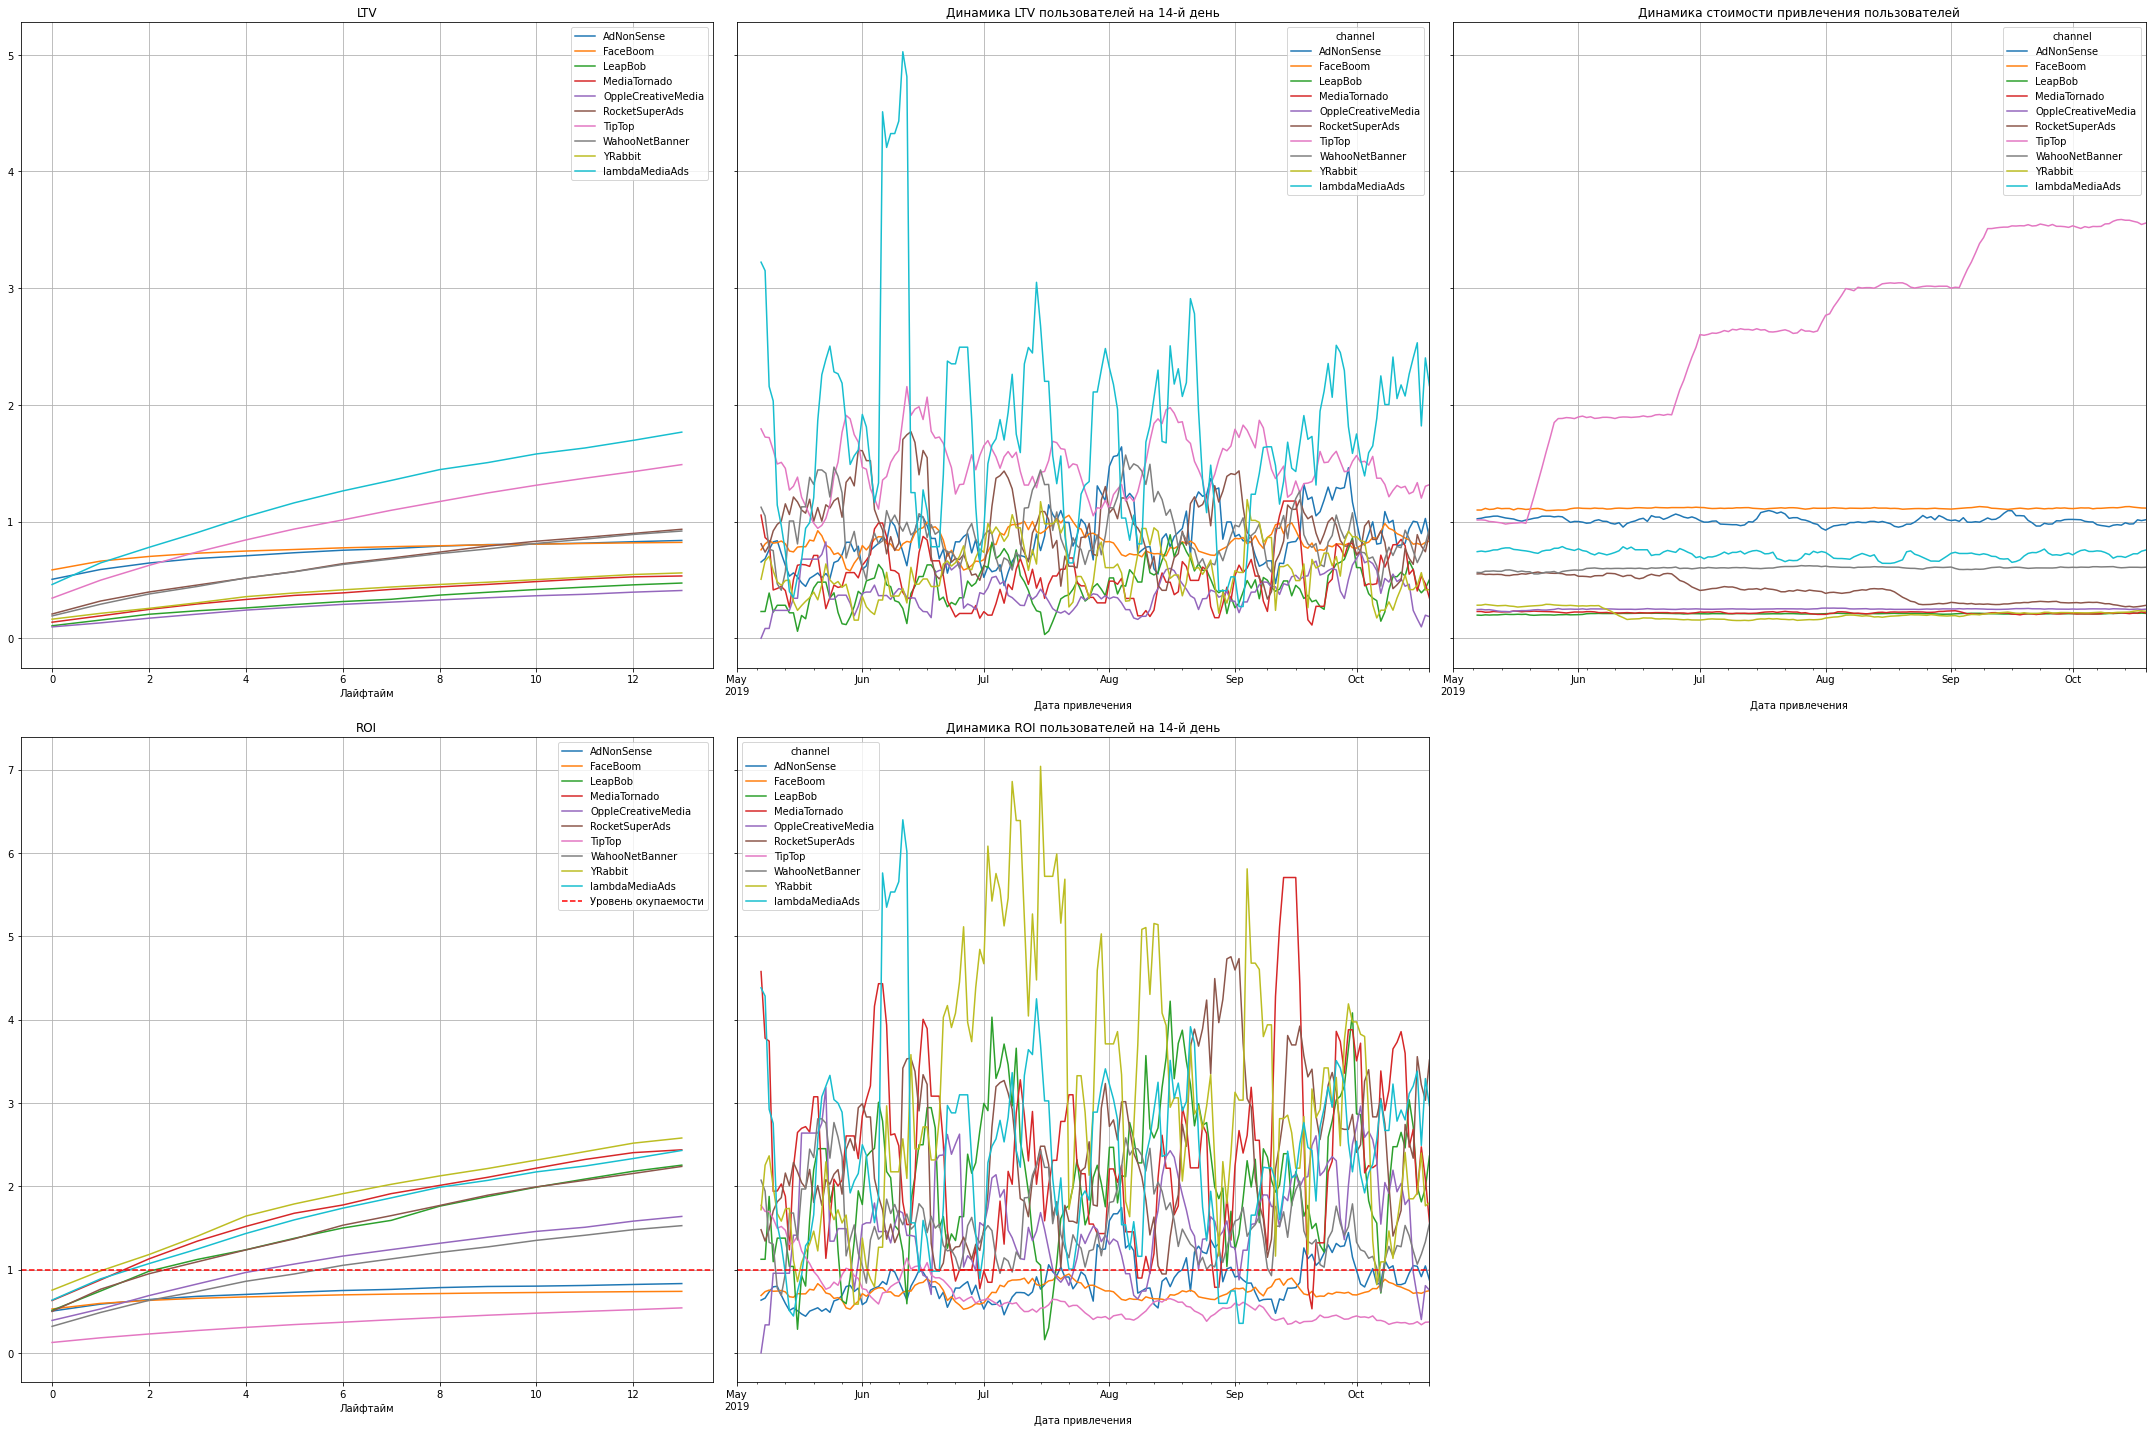

In [132]:
# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 

1)Начнём с первого графика и будем идти слева направо.Самый большой показатель LTV у людей, пришедших с канала lambdaMediaAds. На этом графике вложения в TipTop выглядят вполне логично, данный канал в лидерах по показателю LTV среди привлечённых пользователей, но мы помним, что цена рекламы в данном канале в n-количество раз больше цен на других каналах, и поэтому этот график нам не может рассказать о целесобразности вложений в  Tip Top. Также, хорошие показатели LTV у AdNonSense и FaceBoom. Хуже всего дела обстоят с органическими пользователями, YRabbit и  LeapBob.

2)Во всех  месяцах лидирует канал lambdaMediaAds, но,если рассматривать меньшие временные промежутки порой он сильно уступает позицию лидера каналу TipTop, который стабильно занимает позицию второго канала по показателю LTV 14-ого дня. Интересно заметить, что в начале июня у канала lambdaMediaAds был очень большой скачок по данному показателю.

3)Из динамики стоимости привлечения пользователей мы не узнали ничего нового, так как ранее строили гистограмму по идентичному показателю

4)Порог окупаемости перешагнули далеко не все привлеченные пользователи. В лидеры выбился YRabbit, среди просто перешагнувших порог можно выделить такие каналы, как: MediaTornado, lambdaMediaAds, RocketSeperAds. Совсем не прошёл порог самый дорогой канал TipTop, FaceBoom и AdNonSense. Делаем вывод-пользователи с этих трёх каналов не окупаются вообще

5)Канал YRabbit сначала не выделялся на общем фоне, но потом (примерно в середине июня) произошёл заметный скачок и он остался лидером в дальнейшем. Сначала (в мае-июне) лидировал канал lambdaMediaAds. Стабильно плоха окупаемость канала TipTop по всем месяцам, он лишь дважды и совсем недолго пересекал черту окупаемости. Также, аутсайдером является FaceBoom. В последние месяца MediaTornado составлял коонкуренцию каналу YRabbit.

In [133]:
#Вызовем фун-ию расчёта конверсии
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(non_organic_profiles, 
                                                                        orders,
                                                                        observation_date,
                                                                        14,
                                                                        dimensions = ['channel'])

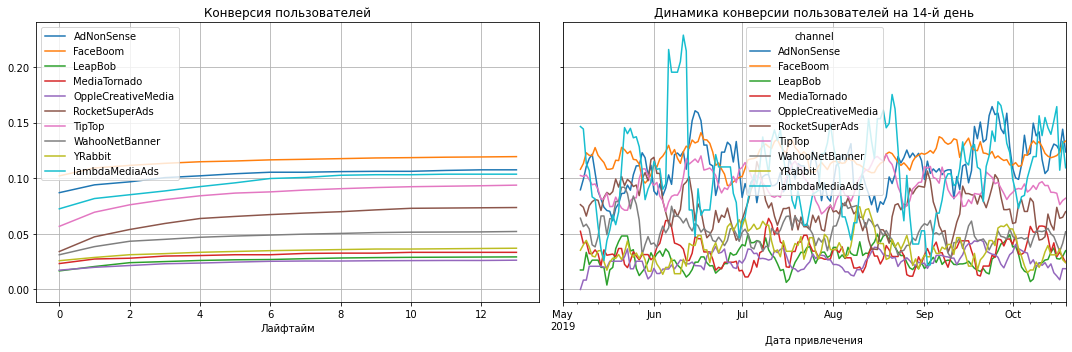

In [134]:
#Вызовем фун-ию постройки графиков конверсии
plot_conversion(conversion_grouped, conversion_in_time, 14)

1)Лучшими показателями конверсии обладают такие каналы, как: FaceBoom, AdNonSense,lambdaMediaAds, и пользователи, пришедшие с канала Tip-Top, который находится на четвёртом месте. Хуже всего дела обстоят с каналами WahooNetBanner и LeapBob.

2)В динамике по месяцам канал FaceBoom выглядит самым стабильным, у канала AdNonSense мы видим очень большие скачки(самые большие точки конверсии пользователей на 14-й день-относятся к ользователям данного канала), но тем не менее он не лидирует, т.к после каждого роста идёт очень сильное ппадение. Касаемо тенденции по месяцам, на графике нет общей регрессии  по показателю.

In [135]:
#Вызовем фун-ю удержания
retention_raw, retention_grouped, retention_in_time = get_retention(non_organic_profiles, 
                                                                    visits,
                                                                    observation_date, 
                                                                    14, 
                                                                    dimensions = ['channel'])

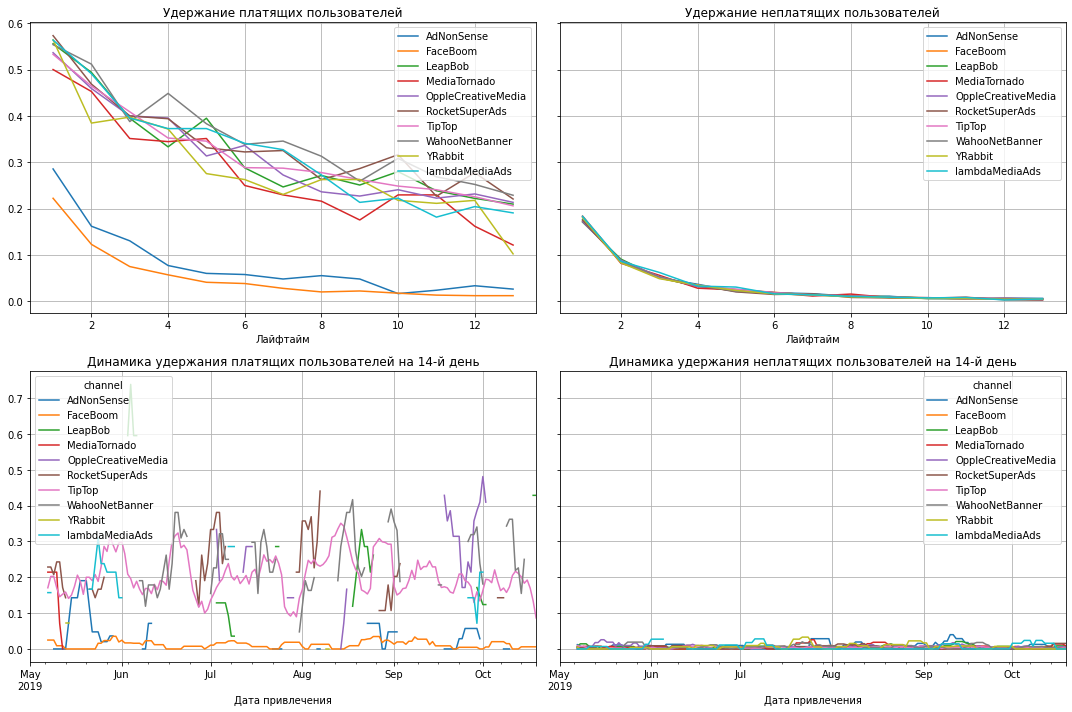

In [136]:
#Вызовем фун-ию постройки графиков удержания
plot_retention(retention_grouped, retention_in_time, 14)

1)Первым делом очень бросаются в глаза аутсайдеры по удержанию, это канала FaceBoom и AdNonSense. Лидерами являются каналы WahooNetBanner, RocketSuperAds.

2)В целом удержание неплатящих пользователей выглядит одинаково в независимости от канала привлечения пол-ей, но в некоторые месяца немного выделяется канал lambdaMediaAds

3)Подобный внешний вид графика уже встречался в построении удержания по странам. Мы видим прерывистость линий графика и можем предположить, что это связано с тем, что не во все дни были когорты, для которых мы можем найти удержание 14-ого дня. Стабильное, но низкое удержание присутствует у канала FaceBoom. Не менее стабильное, но отнсительно высокое удержание мы видим у канала TipTop. Вывод- у канала TipTop хороший и стабильный показатель удержания.

4)В мае по показателю удержания 14-ого дня среди неплатящих пользователей лидировал канал OppleCreativeMedia. В июне все каналы шли примерно одинаково. В июле лидерство взяли каналы lambdaMediaAds,WahooNetBanner и AdNonSense. В августе- пики были замечены у MediaTornado, YRabbit,AdNonSense. В сентябре-AdNonSense,WahooNetBanner. В октябре-lambdaMediaAds. 

# Шаг 6. Выводы

Как мы выяснили входе аналитического исследования, основная проблема-это финансовые вложения в "не те" каналы. Финансовые вложения в TipTop не окупаются, несмотря на хороший показатель LTV, об этом нам говорит график с показателями ROI. По остальным показателям(конверсия, удержание) Tip Top тоже не является лидером, а на него, на минуточку, уходит половина рекламного бюджета.
но возникает логичный вопрос куда в таком случае вкладывать рекламный бюджет. Лидером по количеству плательщиков является канал FaceBoom, но стоимость привлечения одного пользователя нельзя назвать маленькой, поэтому пользователи с этого канала тоже не окупаются, что видно по графику ROI. Лучше обратить внимания на каналы привлечения, перешагнувшие минимальный уровень окупаемости и особенно к лидерам среди них (YRabbit,MediaTornado,lambdaMediaAds).
Еще один важный вопрос-стоит ли совершенно отказываться от продвижения посредствам TipTop, ведь он всё-таки привлекает довольно большую часть платящих пользователей? Я склоняюсь к  тому, что цена привлечения одного пользователя с этого канала настолько велика, что от него можно отказаться.При хорошем LTV, показатели ROI очень плохи.

Больше всего пользуются приложением жители США, возможно, стоит пытаться увеличить масштабы привлечения пользователей из других стран и провести дальнейшие исследования. Но привлечение пользователей из США-выглядит логичным, среди них самый большой процент платящих пользователей. Как мы помним из динамики удержания платящих пользователей на 14-й день, скорее всего пользователей не США привлекалось слишком малое количество для полноценной динамики.

Девайсы пользователей не сильно отражаются на маркетинговых показателях, думаю, на это нужно обращать внимание в последнюю очередь.